<a href="https://colab.research.google.com/github/jpadolina/hackathon/blob/main/Adoption_and_Return_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Selecting libraries
import pandas as pd
import pandas_gbq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import rc
% matplotlib inline
import io
from datetime import datetime
from functools import reduce

## Load Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Austin_Animal_Center_Intakes.csv to Austin_Animal_Center_Intakes.csv
Saving Austin_Animal_Center_Outcomes.csv to Austin_Animal_Center_Outcomes.csv
Saving travis_austin_new dataset.csv to travis_austin_new dataset.csv


In [4]:
df_intake = pd.read_csv(io.BytesIO(uploaded['Austin_Animal_Center_Intakes.csv'])) #data from 2014 to 2021. do we restrict the lower limit?
df_outcome = pd.read_csv(io.BytesIO(uploaded['Austin_Animal_Center_Outcomes.csv']))
df_covid = pd.read_csv(io.BytesIO(uploaded['travis_austin_new dataset.csv']))

## Data Cleaning and EDA

In [5]:
#Inner joining intake and outcome file

df_merge = pd.merge(df_intake, df_outcome, on='Animal ID')
df_merge['DateTime_y']= pd.to_datetime(df_merge['DateTime_y']) #outcome date
df_merge['DateTime_x']= pd.to_datetime(df_merge['DateTime_x']) #intake date

#Calculating a new field for total time in shelter
df_merge["DateTime_y"] = [d.date() for d in df_merge["DateTime_y"]]
df_merge["DateTime_x"] = [d.date() for d in df_merge["DateTime_x"]]

df_merge['total_time_in_shelter_days'] = (df_merge['DateTime_y']-df_merge['DateTime_x']).dt.days
df_merge.head()

,Animal ID,Name_x,DateTime_x,MonthYear_x,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,Breed_x,Color_x,Name_y,DateTime_y,MonthYear_y,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y,total_time_in_shelter_days
0,A786884,*Brock,2019-01-03,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,*Brock,2019-01-08,01/08/2019 03:11:00 PM,01/03/2017,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,5
1,A706918,Belle,2015-07-05,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Belle,2015-07-05,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,0
2,A724273,Runster,2016-04-14,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Runster,2016-04-21,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White,7
3,A665644,NaN,2013-10-21,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,2013-10-21,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,0
4,A682524,Rio,2014-06-29,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Rio,2014-07-02,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,3


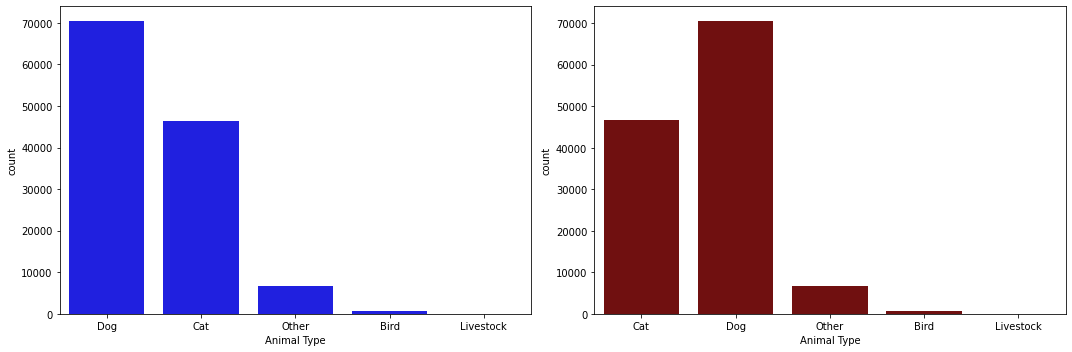

In [6]:
#Analyzing frequency of animal type in the intake-dataset

fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (15,5))
plt.subplots_adjust(hspace = 0.8)
sns.countplot(ax=axes[0], x="Animal Type", data=df_intake, color='blue')
sns.countplot(ax=axes[1], x="Animal Type", data=df_outcome, color='maroon')
fig.show()
fig.tight_layout()

#More than 50% animals comprises of dogs

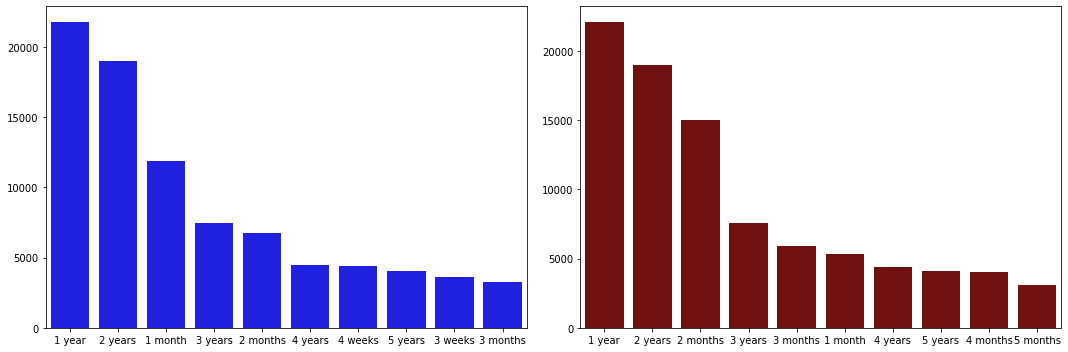

In [7]:
#Analyzing distribution of animal age upon intake in the intake-dataset
age_upon_intake = df_intake['Age upon Intake'].value_counts().head(10)
age_upon_outcome = df_outcome['Age upon Outcome'].value_counts().head(10)

fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (15,5))
plt.subplots_adjust(hspace = 0.9)
sns.barplot(ax=axes[0], x=age_upon_intake.index, y=age_upon_intake.values, data=df_intake, color='blue')
sns.barplot(ax=axes[1], x=age_upon_outcome.index, y=age_upon_outcome.values, data=df_outcome, color='maroon')
fig.show()
fig.tight_layout()

#Most of the intake/outcome animals with age 1-2 years

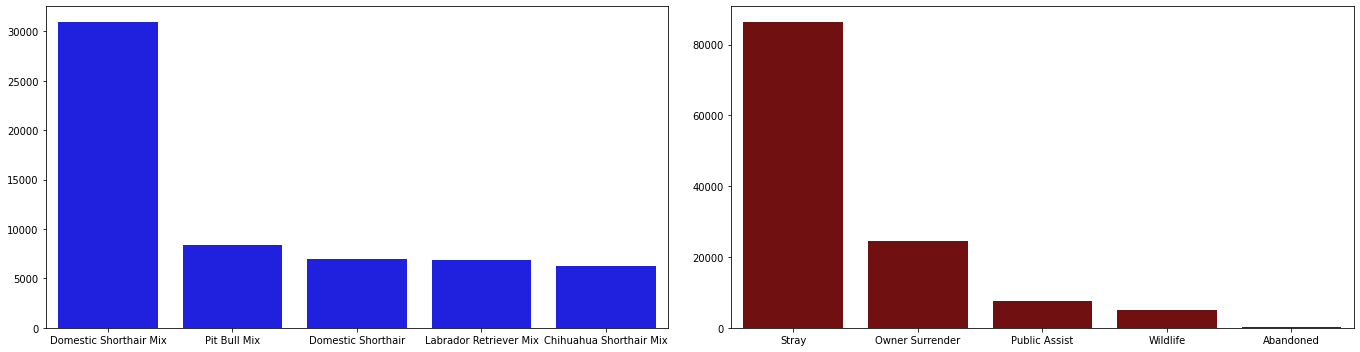

In [ ]:
#Top 5 Animal Breed, Intake Type - Intake data

breed = df_intake['Breed'].value_counts().head(5)
intake_type = df_intake['Intake Type'].value_counts().head(5)
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (19,5))
plt.subplots_adjust(hspace = 0.9)
sns.barplot(ax=axes[0], x=breed.index, y=breed.values, color='blue')
sns.barplot(ax=axes[1], x=intake_type.index, y=intake_type.values, color='maroon')

fig.show()
fig.tight_layout()


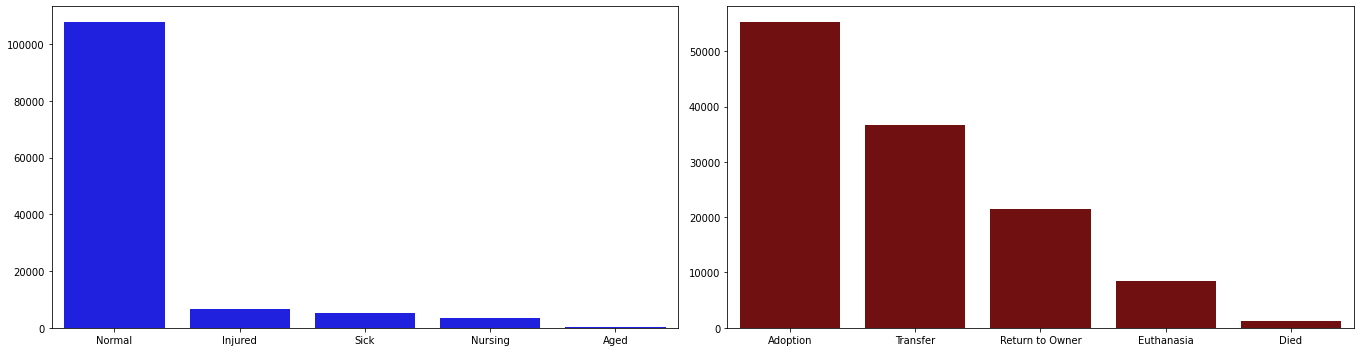

In [ ]:
#Intake condition vs Outcome Type

intake_condition = df_intake['Intake Condition'].value_counts().head(5)
outcome_condition = df_outcome['Outcome Type'].value_counts().head(5)
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (19,5))
plt.subplots_adjust(hspace = 0.9)
sns.barplot(ax=axes[0], x=intake_condition.index, y=intake_condition.values, color='blue')
sns.barplot(ax=axes[1], x=outcome_condition.index, y=outcome_condition.values, color='maroon')

fig.show()
fig.tight_layout()


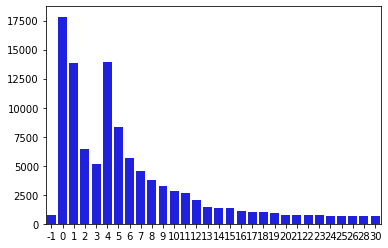

In [ ]:
shelter_days = df_merge['total_time_in_shelter_days'].value_counts().head(30)
sns.barplot( x=shelter_days.index, y=shelter_days.values, color='blue')
fig.show()
fig.tight_layout()


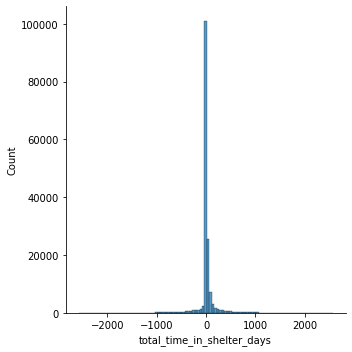

In [ ]:
sns.displot(df_merge, x="total_time_in_shelter_days", binwidth=50)

## Create dataframes showing counts of adoption, transfer, intake, and surrender

In [12]:
df_outcome.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [13]:
df_adoptionrate = pd.DataFrame(columns = ['Date','Adopt_count'])
df_transferrate = pd.DataFrame(columns = ['Date','Transfer_count'])
df_surrenderrate = pd.DataFrame(columns = ['Date','Surrender_count'])
df_intakecount = pd.DataFrame(columns = ['Date','Intake_count'])

In [14]:
df_adoptionrate['Date'] = pd.to_datetime(df_outcome['DateTime'])
df_adoptionrate['Date'] = df_adoptionrate['Date'].dt.date

df_transferrate['Date'] = pd.to_datetime(df_outcome['DateTime'])
df_transferrate['Date'] = df_transferrate['Date'].dt.date

df_surrenderrate['Date'] = pd.to_datetime(df_intake['DateTime'])
df_surrenderrate['Date'] = df_surrenderrate['Date'].dt.date

df_intakecount['Date'] = pd.to_datetime(df_intake['DateTime'])
df_intakecount['Date'] = df_intakecount['Date'].dt.date

In [15]:
df_intakecount['Intake_count'] = 1

In [16]:
df_intakecount.head(10)

,Date,Intake_count
0,2019-01-03,1
1,2015-07-05,1
2,2016-04-14,1
3,2013-10-21,1
4,2014-06-29,1
5,2017-02-18,1
6,2019-04-16,1
7,2015-07-30,1
8,2020-06-18,1
9,2018-06-11,1


### Create and aggregate adoption counts per day

In [17]:
# Adoption count
df_adoptionrate['Adopt_count'].loc[df_outcome['Outcome Type'] == 'Adoption'] = 1
df_adoptionrate['Adopt_count'].loc[df_outcome['Outcome Type'] != 'Adoption'] = 0

# Transfer count
df_transferrate['Transfer_count'].loc[df_outcome['Outcome Type'] == 'Transfer'] = 1
df_transferrate['Transfer_count'].loc[df_outcome['Outcome Type'] != 'Transfer'] = 0

# Surrender count
df_surrenderrate['Surrender_count'].loc[df_intake['Intake Type'] == 'Owner Surrender'] = 1
df_surrenderrate['Surrender_count'].loc[df_intake['Intake Type'] != 'Owner Surrender'] = 0

In [18]:
# Aggregate adoption and transfer counts by day
df_adoptionrate = df_adoptionrate.groupby('Date').sum()
df_transferrate = df_transferrate.groupby('Date').sum()
df_surrenderrate = df_surrenderrate.groupby('Date').sum()
df_intakecount = df_intakecount.groupby('Date').sum()

In [19]:
df_intakecount.head(10)

,Intake_count
Date,
2013-10-01,77
2013-10-02,53
2013-10-03,42
2013-10-04,47
2013-10-05,67
2013-10-06,37
2013-10-07,30
2013-10-08,66
2013-10-09,41


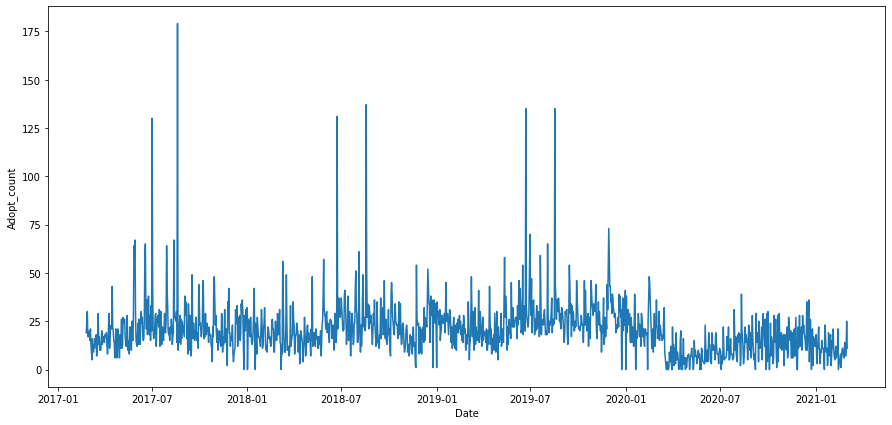

In [20]:
# Plot adoptions over time in the last 4 years
plt.figure(figsize = (15,7))
plot = sns.lineplot(data = df_adoptionrate[-1460:], x = "Date", y = "Adopt_count")

### Interesting findings
- Unlike the prevailing sentiment in the media, adoptions sharply dropped following the onset of the pandemic.
- There is strong evidence of seasonal peaks in adoption in the summer months. This is absent in 2020.
- Should the shelter plan for ongoing low adoption rates?
- Alternatively, perhaps the low adoption numbers were offset by simultaneous .lower owner surrender intake. We should look at transfers and owner surrender to get a sense of this.

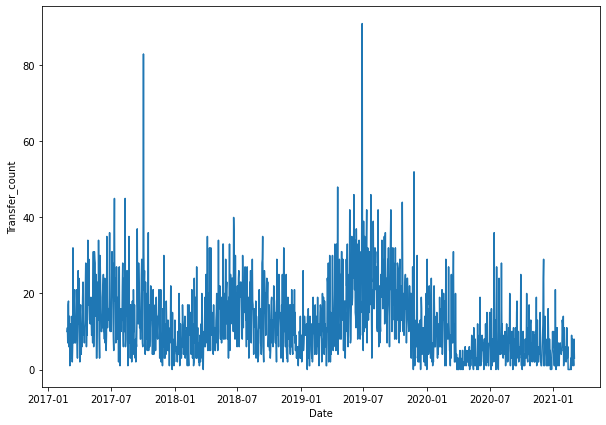

In [21]:
# Plot transfers over time in the last 4 years
plt.figure(figsize = (10,7))
plot = sns.lineplot(data = df_transferrate[-1460:], x = "Date", y = "Transfer_count")

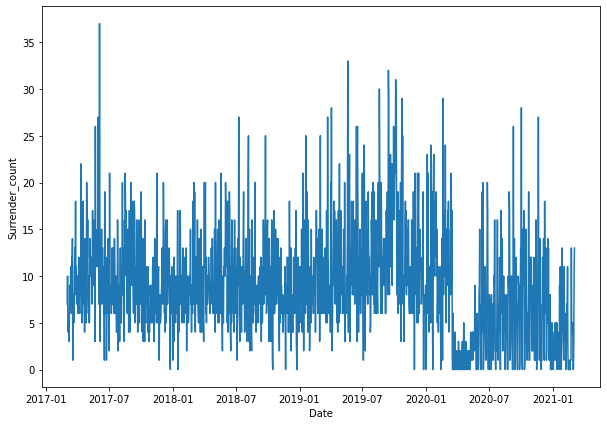

In [22]:
# Now plot surrenders over the last 4 years
plt.figure(figsize = (10,7))
plot = sns.lineplot(data = df_surrenderrate[-1460:], x = "Date", y = "Surrender_count")

Owner surrender does NOT exhibit obvious seasonality or trend, but maybe it is just hard to tell. Despite an initial plunge in surrenders, it restored to nearly pre-pandemic levels during 2020. Will this number increase?

In [23]:
# Create a dataframe merging all 3 counts (adoption, transfer, and surrender) into one dataframe.
df_forecast = reduce(lambda x,y: pd.merge(x,y, on = "Date", how = "inner"), [df_adoptionrate, df_transferrate, df_surrenderrate, df_intakecount])

In [26]:
df_forecast['adopt_intake_diff'] = df_forecast['Adopt_count'] - df_forecast['Intake_count']

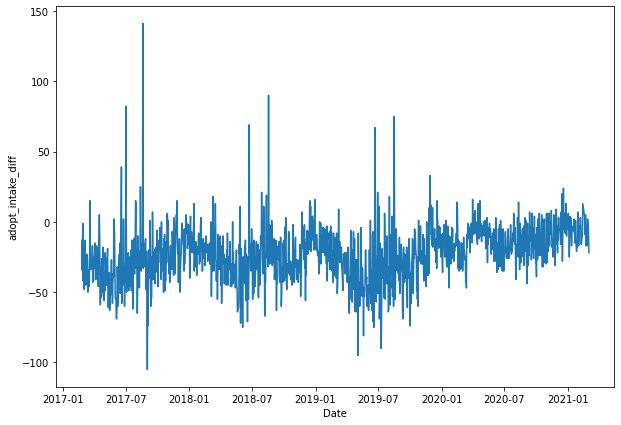

In [27]:
plt.figure(figsize = (10,7))
plot = sns.lineplot(data = df_forecast[-1460:], x = "Date", y = "adopt_intake_diff")

## Export forecast dataframe to BigQuery

Restrict date range to before the shelter closes. We want to forecast the intake count from pre-COVID data. What would intake have been expected to be if COVID-19 had not occurred? This may help us estimate the volume of intake that did not happen, representing the number of strays/surrenders/ abandoned animals not helped by the shelter.

In [28]:
# Stack the dataframe
df_forecast_stack = pd.DataFrame(df_forecast.stack()).reset_index()
df_forecast_stack = df_forecast_stack.rename(columns = {"Date":"Date","level_1":"Metric",0:"Count"})

df_forecast_stack['Date'] = pd.to_datetime(df_forecast_stack['Date'])
#df_adoptionrate['Date'] = df_adoptionrate['Date'].dt.date

df_forecast_stack = df_forecast_stack.loc[df_forecast_stack['Date'] < datetime(2020,3,16)]

print(df_forecast_stack)

            Date             Metric  Count
0     2013-10-01        Adopt_count     11
1     2013-10-01     Transfer_count     17
2     2013-10-01    Surrender_count     11
3     2013-10-01       Intake_count     77
4     2013-10-01  adopt_intake_diff    -66
...          ...                ...    ...
11770 2020-03-15        Adopt_count     32
11771 2020-03-15     Transfer_count      9
11772 2020-03-15    Surrender_count     17
11773 2020-03-15       Intake_count     50
11774 2020-03-15  adopt_intake_diff    -18

[11775 rows x 3 columns]


In [25]:
pandas_gbq.to_gbq(df_forecast_stack, destination_table = 'forecast.table2', project_id='neon-webbing-310703', if_exists = 'replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=FrtiDQH6MzvZWALZHaT0slCXPx8LoL&prompt=consent&access_type=offline
Enter the authorization code: 4/1AY0e-g4snhMY4GGEPTJbC1vp61tvmmqzhA5yqnVnMeg8f_9r3PWwoiJ1XX4


1it [00:06,  6.01s/it]


# Modeling

We now have the dataframe in Google BigQuery. There, we will run an ARIMA model for each count (3 models total) and forecast adoptions, transfers, and surrenders for the next 30 days. We'll also visualize the results in Tableau.